# Airlines Passenger Prediction using RNN - LSTM

### LSTM for international airline passengers problem with time step regression framing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
data=pd.read_csv("AirPassengers.csv")
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
data=data['#Passengers']

In [4]:
data=np.array(data).reshape(-1,1)
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

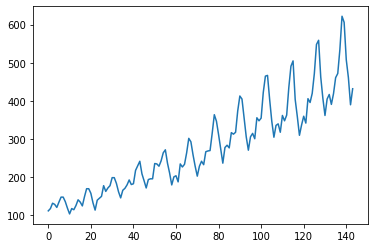

In [5]:
plt.plot(data)

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data)
dataset.shape

(144, 1)

In [7]:
# split into train and test sets
train_size = 100
test_size = 44

train= dataset[0:train_size,:]
test=dataset[train_size:144,:]

train.shape,test.shape

((100, 1), (44, 1))

In [8]:
# convert an array of values into a dataset matrix
def get_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1

look_back = 1

trainX, trainY = get_dataset(train, look_back)
trainX.shape, trainY.shape

((98, 1), (98,))

In [10]:
testX, testY = get_dataset(test, look_back)
testX.shape, testY.shape

((42, 1), (42,))

The LSTM network expects the input data (X) to be provided with a specific array structure in the form of: [samples, time steps, features].

In [11]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.

In [12]:
# create  the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4)                 96        
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [13]:
# fit the LSTM network
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
98/98 - 0s - loss: 0.0402
Epoch 2/100
98/98 - 0s - loss: 0.0196
Epoch 3/100
98/98 - 0s - loss: 0.0143
Epoch 4/100
98/98 - 0s - loss: 0.0131
Epoch 5/100
98/98 - 0s - loss: 0.0121
Epoch 6/100
98/98 - 0s - loss: 0.0113
Epoch 7/100
98/98 - 0s - loss: 0.0104
Epoch 8/100
98/98 - 0s - loss: 0.0095
Epoch 9/100
98/98 - 0s - loss: 0.0085
Epoch 10/100
98/98 - 0s - loss: 0.0076
Epoch 11/100
98/98 - 0s - loss: 0.0067
Epoch 12/100
98/98 - 0s - loss: 0.0060
Epoch 13/100
98/98 - 0s - loss: 0.0052
Epoch 14/100
98/98 - 0s - loss: 0.0045
Epoch 15/100
98/98 - 0s - loss: 0.0039
Epoch 16/100
98/98 - 0s - loss: 0.0034
Epoch 17/100
98/98 - 0s - loss: 0.0031
Epoch 18/100
98/98 - 0s - loss: 0.0028
Epoch 19/100
98/98 - 0s - loss: 0.0026
Epoch 20/100
98/98 - 0s - loss: 0.0024
Epoch 21/100
98/98 - 0s - loss: 0.0023
Epoch 22/100
98/98 - 0s - loss: 0.0022
Epoch 23/100
98/98 - 0s - loss: 0.0022
Epoch 24/100
98/98 - 0s - loss: 0.0022
Epoch 25/100
98/98 - 0s - loss: 0.0022
Epoch 26/100
98/98 - 0s - loss: 0.

In [14]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
testPredict

array([[0.47369212],
       [0.5875375 ],
       [0.6555231 ],
       [0.658582  ],
       [0.5578532 ],
       [0.45952946],
       [0.38359198],
       [0.43988505],
       [0.44705054],
       [0.40735155],
       [0.485994  ],
       [0.46130565],
       [0.48774427],
       [0.60853374],
       [0.6945615 ],
       [0.7149285 ],
       [0.5578532 ],
       [0.48073235],
       [0.39275402],
       [0.44167873],
       [0.48248807],
       [0.45062393],
       [0.56118596],
       [0.5444385 ],
       [0.5842741 ],
       [0.6661885 ],
       [0.77464324],
       [0.789241  ],
       [0.652455  ],
       [0.56284916],
       [0.48599398],
       [0.55952066],
       [0.57936245],
       [0.53598684],
       [0.5826391 ],
       [0.6493775 ],
       [0.6661885 ],
       [0.75703835],
       [0.86774814],
       [0.8486103 ],
       [0.7192333 ],
       [0.6493775 ]], dtype=float32)

In [15]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [16]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.30 RMSE
Test Score: 50.54 RMSE


We can see that the model has an average error of about 23 passengers (in thousands) on the training dataset, and about 48 passengers (in thousands) on the test dataset. Not that bad.

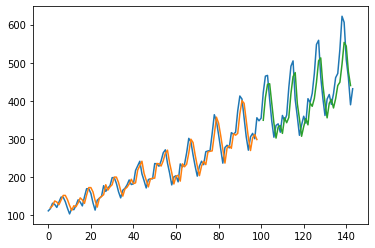

In [17]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression Using the Window Method

In [18]:
# We can re-run the example in the previous section with the larger window size. 

In [19]:
# reshape into X=t and Y=t+1
look_back = 3
trainX1, trainY1 = get_dataset(train, look_back)
testX1, testY1 = get_dataset(test, look_back)


In [20]:
# reshape input to be [samples, time steps, features]
trainX1 = np.reshape(trainX1, (trainX1.shape[0], 1, trainX1.shape[1]))
testX1 = np.reshape(testX1, (testX1.shape[0], 1, testX1.shape[1]))
trainX1.shape, trainY1.shape

((96, 1, 3), (96,))

In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [22]:
model.fit(trainX1, trainY1, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
96/96 - 0s - loss: 0.0697
Epoch 2/100
96/96 - 0s - loss: 0.0300
Epoch 3/100
96/96 - 1s - loss: 0.0177
Epoch 4/100
96/96 - 1s - loss: 0.0144
Epoch 5/100
96/96 - 0s - loss: 0.0124
Epoch 6/100
96/96 - 0s - loss: 0.0107
Epoch 7/100
96/96 - 0s - loss: 0.0092
Epoch 8/100
96/96 - 0s - loss: 0.0079
Epoch 9/100
96/96 - 0s - loss: 0.0066
Epoch 10/100
96/96 - 0s - loss: 0.0058
Epoch 11/100
96/96 - 0s - loss: 0.0050
Epoch 12/100
96/96 - 0s - loss: 0.0046
Epoch 13/100
96/96 - 0s - loss: 0.0042
Epoch 14/100
96/96 - 0s - loss: 0.0042
Epoch 15/100
96/96 - 0s - loss: 0.0038
Epoch 16/100
96/96 - 0s - loss: 0.0038
Epoch 17/100
96/96 - 0s - loss: 0.0036
Epoch 18/100
96/96 - 0s - loss: 0.0036
Epoch 19/100
96/96 - 0s - loss: 0.0036
Epoch 20/100
96/96 - 0s - loss: 0.0035
Epoch 21/100
96/96 - 0s - loss: 0.0036
Epoch 22/100
96/96 - 0s - loss: 0.0035
Epoch 23/100
96/96 - 0s - loss: 0.0034
Epoch 24/100
96/96 - 0s - loss: 0.0034
Epoch 25/100
96/96 - 0s - loss: 0.0033
Epoch 26/100
96/96 - 0s - loss: 0.

In [23]:
# make predictions
trainPredict1 = model.predict(trainX1)
testPredict1 = model.predict(testX1)



In [24]:
# invert predictions
trainPredict1 = scaler.inverse_transform(trainPredict1)
trainY1 = scaler.inverse_transform([trainY1])
testPredict1 = scaler.inverse_transform(testPredict1)
testY1 = scaler.inverse_transform([testY1])

In [25]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY1[0], trainPredict1[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY1[0], testPredict1[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 22.18 RMSE
Test Score: 61.62 RMSE


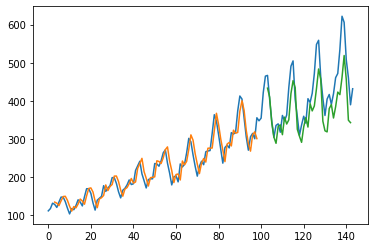

In [26]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict1)+look_back, :] = trainPredict1

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict1)+(look_back*2)+1:len(dataset)-1, :] = testPredict1
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM for Regression with Time Steps

Instead of phrasing the past observations as separate input features, we can use them as time steps of the one input feature, which is indeed a more accurate framing of the problem.

We can do this using the same data representation as in the previous window-based example, except when we reshape the data, we set the columns to be the time steps dimension and change the features dimension back to 1. For example:

In [27]:
# reshape into X=t and Y=t+1
look_back = 3
trainX2, trainY2 = get_dataset(train, look_back)
testX2, testY2 = get_dataset(test, look_back)


In [28]:
# reshape input to be [samples, time steps, features]
trainX2 = np.reshape(trainX2, (trainX2.shape[0], trainX2.shape[1], 1))
testX2 = np.reshape(testX2, (testX2.shape[0], testX2.shape[1], 1))
trainX2.shape, trainY2.shape

((96, 3, 1), (96,))

In [29]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX2, trainY2, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
96/96 - 0s - loss: 0.0345
Epoch 2/100
96/96 - 0s - loss: 0.0137
Epoch 3/100
96/96 - 0s - loss: 0.0115
Epoch 4/100
96/96 - 0s - loss: 0.0100
Epoch 5/100
96/96 - 0s - loss: 0.0086
Epoch 6/100
96/96 - 0s - loss: 0.0070
Epoch 7/100
96/96 - 0s - loss: 0.0059
Epoch 8/100
96/96 - 0s - loss: 0.0051
Epoch 9/100
96/96 - 0s - loss: 0.0046
Epoch 10/100
96/96 - 0s - loss: 0.0043
Epoch 11/100
96/96 - 0s - loss: 0.0042
Epoch 12/100
96/96 - 0s - loss: 0.0038
Epoch 13/100
96/96 - 0s - loss: 0.0040
Epoch 14/100
96/96 - 0s - loss: 0.0039
Epoch 15/100
96/96 - 0s - loss: 0.0038
Epoch 16/100
96/96 - 0s - loss: 0.0038
Epoch 17/100
96/96 - 0s - loss: 0.0038
Epoch 18/100
96/96 - 0s - loss: 0.0037
Epoch 19/100
96/96 - 0s - loss: 0.0038
Epoch 20/100
96/96 - 0s - loss: 0.0038
Epoch 21/100
96/96 - 0s - loss: 0.0039
Epoch 22/100
96/96 - 0s - loss: 0.0037
Epoch 23/100
96/96 - 0s - loss: 0.0036
Epoch 24/100
96/96 - 0s - loss: 0.0038
Epoch 25/100
96/96 - 0s - loss: 0.0037
Epoch 26/100
96/96 - 0s - loss: 0.

In [30]:
# make predictions
trainPredict2 = model.predict(trainX2)
testPredict2 = model.predict(testX2)


In [31]:
# invert predictions
trainPredict2 = scaler.inverse_transform(trainPredict2)
trainY2 = scaler.inverse_transform([trainY2])
testPredict2 = scaler.inverse_transform(testPredict2)
testY2 = scaler.inverse_transform([testY2])


Train Score: 23.30 RMSE
Test Score: 47.05 RMSE


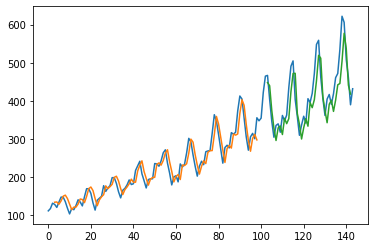

In [32]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY2[0], trainPredict2[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY2[0], testPredict2[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict2)+look_back, :] = trainPredict2
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict2)+(look_back*2)+1:len(dataset)-1, :] = testPredict2
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM with Memory Between Batches

The LSTM network has memory, which is capable of remembering across long sequences.

Normally, the state within the network is reset after each training batch when fitting the model, as well as each call to model.predict() or model.evaluate().

We can gain finer control over when the internal state of the LSTM network is cleared in Keras by making the LSTM layer “stateful”. This means that it can build state over the entire training sequence and even maintain that state if needed to make predictions.

It requires that the training data not be shuffled when fitting the network. It also requires explicit resetting of the network state after each exposure to the training data (epoch) by calls to model.reset_states(). This means that we must create our own outer loop of epochs and within each epoch call model.fit() and model.reset_states(). For example:

In [33]:
# LSTM for international airline passengers problem with memory

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
#numpy.random.seed(7)



In [34]:
# load the dataset
dataframe = pd.read_csv('AirPassengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [35]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()


92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0065
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0036
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0035
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0034
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0033
92/92 - 0s - loss: 0.0032
92/92 - 0s -

In [36]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)


In [37]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


In [38]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 23.40 RMSE
Test Score: 57.96 RMSE


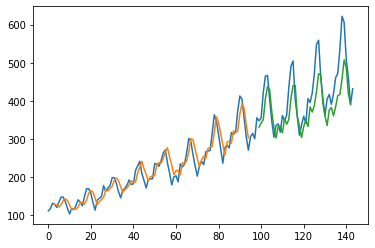

In [39]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()